In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import scipy.stats as st

In [ ]:
train = pd.read_csv('/content/credit_train.csv', encoding='cp1251', sep = ';') 
X_test = pd.read_csv('/content/credit_test.csv', encoding='cp1251', sep = ';') 

In [ ]:
new_data = []

In [ ]:
for i in range(len(X_test)):
  new_data.append(3) 

In [ ]:
X_test['open_account_flg'] = new_data

In [ ]:
result = pd.concat([train, X_test])

In [ ]:
result['credit_sum'] = train['credit_sum'].str.replace(',','.')
result['score_shk'] = result['score_shk'].str.replace(',','.')
result['credit_sum'] = result['credit_sum'].astype(float)
result['score_shk'] = result['score_shk'].astype(float)

In [ ]:
result.isnull().sum()

client_id                   0
gender                      0
age                         0
marital_status              0
job_position                0
credit_sum                  0
credit_month                0
tariff_id                   0
score_shk                   0
education                   0
living_region             308
monthly_income              1
credit_count            13933
overdue_credit_count    13933
open_account_flg            0
dtype: int64

In [ ]:
result.shape

(262686, 15)

In [ ]:
result = result.dropna()

In [ ]:
result.shape

(248471, 15)

In [ ]:
result = result.drop('client_id', axis=1)

In [ ]:
set(result.gender)

{'F', 'M'}

In [ ]:
set(result.marital_status)

{'CIV', 'DIV', 'MAR', 'UNM', 'WID'}

In [ ]:
set(result.job_position)

{'ATP',
 'BIS',
 'BIU',
 'DIR',
 'HSK',
 'INP',
 'INV',
 'NOR',
 'ONB',
 'PNA',
 'PNI',
 'PNS',
 'PNV',
 'SPC',
 'UMN',
 'WOI',
 'WRK',
 'WRP'}

In [ ]:
set(result.education)

{'ACD', 'GRD', 'PGR', 'SCH', 'UGR'}

In [ ]:
result['living_region'] = result['living_region'].replace({'КРАЙ ЗАБАЙКАЛЬСКИЙ': 'ЗАБАЙКАЛЬСКИЙ КРАЙ', 'КРАЙ. СТАВРОПОЛЬСКИЙ': 'СТАВРОПОЛЬСКИЙ КРАЙ', 'КРАЙ. ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ', 'КРАЙ.ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ',  'КРАЙ. КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ', 'КРАЙ ХАБАРОВСКИЙ': 'ХАБАРОВСКИЙ КРАЙ', 'КРАЙ СТАВРОПОЛЬСКИЙ': 'СТАВРОПОЛЬСКИЙ КРАЙ', 'КРАЙ ПРИМОРСКИЙ': 'ПРИМОРСКИЙ КРАЙ', 'КРАЙ ПЕРМСКИЙ': 'ПЕРМСКИЙ КРАЙ', 'КРАЙ КРАСНОЯРСКИЙ': 'КРАСНОЯРСКИЙ КРАЙ', 'КРАЙ КРАСНОДАРСКИЙ': 'КРАСНОДАРСКИЙ КРАЙ', 'КРАЙ КАМЧАТСКИЙ': 'КАМЧАТСКИЙ КРАЙ', 'КРАЙ АЛТАЙСКИЙ': 'АЛТАЙСКИЙ КРАЙ', 'КОСТРОМСКАЯ ОБЛ': 'КОСТРОМСКАЯ ОБЛАСТЬ', 'КОМИ': 'КОМИ РЕСП', 'КИРОВСКАЯ ОБЛ': 'КИРОВСКАЯ ОБЛАСТЬ', 'КЕМЕРОВСКАЯ ОБЛ': 'КЕМЕРОВСКАЯ ОБЛАСТЬ', 'КЕМЕРОВСКАЯ': 'КЕМЕРОВСКАЯ ОБЛАСТЬ', 'КАРЕЛИЯ': 'КАРЕЛИЯ РЕСП', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ': 'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСП', 'КАМЧАТС??ИЙ КРАЙ': 'КАМЧАТСКИЙ КРАЙ', 'КАЛУЖСКАЯ ОБЛ': 'КАЛУЖСКАЯ ОБЛАСТЬ', 'КАЛУЖСКАЯ': 'КАЛУЖСКАЯ ОБЛАСТЬ', 'КАЛМЫКИЯ РЕСП': 'КАЛМЫКИЯ', 'КАЛИНИНГРАДСКАЯ ОБЛ.': 'КАЛИНИНГРАДСКАЯ ОБЛ', 'КАБАРДИНО-БАЛКАРСКАЯ РЕСП': 'КАБАРДИНО-БАЛКАРСКАЯ', 'ИРКУТСКАЯ ОБЛ': 'ИРКУТСКАЯ ОБЛАСТЬ', 'ИВАНОВСКАЯ ОБЛ': 'ИВАНОВСКАЯ ОБЛАСТЬ', 'ЕВРЕЙСКАЯ АВТОНОМНАЯ': 'АО ЕВРЕЙСКАЯ', 'ЕВРЕЙСКАЯ АОБЛ': 'АО ЕВРЕЙСКАЯ', 'Г. ЧЕЛЯБИНСК': 'ЧЕЛЯБИНСК', 'Г САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ', 'Г. САНКТ-ПЕТЕРБУРГ': 'САНКТ-ПЕТЕРБУРГ', 'Г МОСКВА': 'МОСКВА', 'Г. МОСКВА': 'МОСКВА', 'ВОРОНЕЖСКАЯ ОБЛ': 'ВОРОНЕЖСКАЯ ОБЛАСТЬ', 'ВОЛОГОДСКАЯ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОЛОГОДСКАЯ ОБЛ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОЛОГОДСКАЯ ОБЛ.': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОЛГОГРАДСКАЯ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВОЛГОГРАДСКАЯ ОБЛ': 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ', 'ВЛАДИМИРСКАЯ ОБЛ': 'ВЛАДИМИРСКАЯ ОБЛАСТЬ', 'БУРЯТИЯ РЕСП': 'БУРЯТИЯ', 'БРЯНСКАЯ ОБЛ': 'БРЯНСКАЯ ОБЛАСТЬ', 'БРЯНСКИЙ': 'БРЯНСКАЯ ОБЛАСТЬ', 'БЕЛГОРОДСКАЯ ОБЛ': 'БЕЛГОРОДСКАЯ ОБЛАСТЬ','БАШКОРТОСТАН РЕСП': 'БАШКОРТОСТАН', 'АСТРАХАНСКАЯ': 'АСТРАХАНСКАЯ ОБЛАСТЬ', 'АСТРАХАНСКАЯ ОБЛ': 'АСТРАХАНСКАЯ ОБЛАСТЬ','АРХАНГЕЛЬСКАЯ': 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ','АРХАНГЕЛЬСКАЯ ОБЛ': 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ','АОБЛ ЕВРЕЙСКАЯ': 'АО ЕВРЕЙСКАЯ', 'АДЫГЕЯ РЕСП': 'АДЫГЕЯ', 'АЛТАЙСКИЙ': 'АЛТАЙСКИЙ КРАЙ', 'АМУРСКАЯ ОБЛ': 'АМУРСКАЯ ОБЛАСТЬ', 'АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю': 'АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'})

In [ ]:
set(result.living_region)

{'74',
 '98',
 'АДЫГЕЯ',
 'АЛТАЙСКИЙ КРАЙ',
 'АМУРСКАЯ ОБЛАСТЬ',
 'АО ЕВРЕЙСКАЯ',
 'АО НЕНЕЦКИЙ',
 'АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА',
 'АО ЧУКОТСКИЙ',
 'АО ЯМАЛО-НЕНЕЦКИЙ',
 'АРХАНГЕЛЬСКАЯ ОБЛАСТЬ',
 'АСТРАХАНСКАЯ ОБЛАСТЬ',
 'БАШКОРТОСТАН',
 'БЕЛГОРОДСКАЯ ОБЛАСТЬ',
 'БРЯНСКАЯ ОБЛАСТЬ',
 'БУРЯТИЯ',
 'ВЛАДИМИРСКАЯ ОБЛАСТЬ',
 'ВОЛГОГРАДСКАЯ ОБЛАСТЬ',
 'ВОЛОГОДСКАЯ ОБЛАСТЬ',
 'ВОРОНЕЖСКАЯ ОБЛАСТЬ',
 'ГОРЬКОВСКАЯ ОБЛ',
 'ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н',
 'ДАГЕСТАН РЕСП',
 'ЗАБАЙКАЛЬСКИЙ КРАЙ',
 'ИВАНОВСКАЯ ОБЛАСТЬ',
 'ИНГУШЕТИЯ РЕСП',
 'ИРКУТСКАЯ ОБЛАСТЬ',
 'КАБАРДИНО-БАЛКАРСКАЯ',
 'КАЛИНИНГРАДСКАЯ ОБЛ',
 'КАЛМЫКИЯ',
 'КАЛУЖСКАЯ ОБЛАСТЬ',
 'КАМЧАТСКАЯ ОБЛАСТЬ',
 'КАМЧАТСКИЙ КРАЙ',
 'КАРАЧАЕВО-ЧЕРКЕССКАЯ РЕСП',
 'КАРЕЛИЯ РЕСП',
 'КЕМЕРОВСКАЯ ОБЛАСТЬ',
 'КИРОВСКАЯ ОБЛАСТЬ',
 'КОМИ РЕСП',
 'КОСТРОМСКАЯ ОБЛАСТЬ',
 'КРАСНОДАРСКИЙ',
 'КРАСНОДАРСКИЙ КРАЙ',
 'КРАСНОЯРСКИЙ КРАЙ',
 'КУРГАНСКАЯ ОБЛ',
 'КУРГАНСКАЯ ОБЛАСТЬ',
 'КУРСКАЯ ОБЛ',
 'КУРСКАЯ ОБЛАСТЬ',
 'ЛЕНИНГРАДСКАЯ',
 'ЛЕНИНГРАДСКАЯ ОБЛ',
 'ЛЕНИНГРАДСКАЯ ОБЛА

In [ ]:
# takes too much time  to replace all errors

In [ ]:
result['living_region'].nunique()

260

In [ ]:
result.dtypes

gender                   object
age                       int64
marital_status           object
job_position             object
credit_sum              float64
credit_month              int64
tariff_id               float64
score_shk               float64
education                object
living_region            object
monthly_income          float64
credit_count            float64
overdue_credit_count    float64
open_account_flg          int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
result['gender'] = LabelEncoder().fit_transform(result['gender'])

In [ ]:
result['marital_status'] = LabelEncoder().fit_transform(result['marital_status'])

In [ ]:
result['job_position'] = LabelEncoder().fit_transform(result['job_position'])

In [ ]:
result['education'] = LabelEncoder().fit_transform(result['education'])

In [ ]:
result['living_region'] = LabelEncoder().fit_transform(result['living_region'])

In [ ]:
result['open_account_flg'].unique()

array([0, 1, 3])

In [ ]:
Test = result[result['open_account_flg'] == 3]

In [ ]:
Train = result[result['open_account_flg'] != 3]

In [ ]:
X_train =  Train.drop('open_account_flg', axis = 1)

In [ ]:
y_train = Train['open_account_flg']

In [ ]:
X_test = Test.drop('open_account_flg', axis = 1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_lr.coef_

array([[ 3.64603803e-05, -1.92111111e-02, -9.44577266e-04,
        -7.36099544e-03, -2.00190563e-05, -3.40659685e-03,
        -8.03334757e-04, -1.80227089e-04, -7.98243247e-04,
        -1.56420074e-03, -1.22446440e-06, -1.99685516e-04,
         3.10099308e-05]])

In [ ]:
accuracy_score(y_train, model_lr.predict(X_train))

0.8350884152199379

In [ ]:
from sklearn.svm import SVC, SVR

In [ ]:
model_svm = SVC()

In [ ]:
model_svm.fit(X_train, y_train)
accuracy_score(y_train, model_svm.predict(X_train))

In [ ]:
from sklearn.neighbors  import KNeighborsClassifier 

In [ ]:
model_knc = KNeighborsClassifier()

In [ ]:
model_knc.fit(X_train, y_train)
accuracy_score(y_train, model_knc.predict(X_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_dtc = DecisionTreeClassifier()

In [ ]:
model_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_train, model_dtc.predict(X_train))

0.9989091427473488

In [ ]:
model_rfc = RandomForestClassifier()

In [ ]:
models = []
scores_train = []
#scores_test = []
n_estimators = list(range(1, 20))
for estimators in n_estimators:
    model_rfc = RandomForestClassifier(n_estimators=estimators, random_state=0)
    model_rfc.fit(X_train, y_train)
    models.append(model_rfc)
    scores_train.append(model_rfc.score(X_train, y_train))

In [ ]:
models

[RandomForestClassifier(n_estimators=1, random_state=0),
 RandomForestClassifier(n_estimators=2, random_state=0),
 RandomForestClassifier(n_estimators=3, random_state=0),
 RandomForestClassifier(n_estimators=4, random_state=0),
 RandomForestClassifier(n_estimators=5, random_state=0),
 RandomForestClassifier(n_estimators=6, random_state=0),
 RandomForestClassifier(n_estimators=7, random_state=0),
 RandomForestClassifier(n_estimators=8, random_state=0),
 RandomForestClassifier(n_estimators=9, random_state=0),
 RandomForestClassifier(n_estimators=10, random_state=0),
 RandomForestClassifier(n_estimators=11, random_state=0),
 RandomForestClassifier(n_estimators=12, random_state=0),
 RandomForestClassifier(n_estimators=13, random_state=0),
 RandomForestClassifier(n_estimators=14, random_state=0),
 RandomForestClassifier(n_estimators=15, random_state=0),
 RandomForestClassifier(n_estimators=16, random_state=0),
 RandomForestClassifier(n_estimators=17, random_state=0),
 RandomForestClassifier

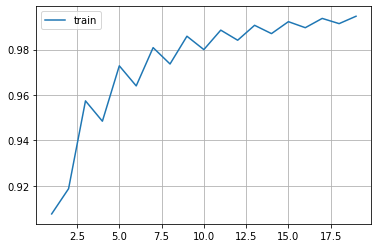

In [ ]:
plt.plot(n_estimators, scores_train, label='train')

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
models = []
scores_train = []
max_features = list(range(1, 13))
for features in max_features:
    model = RandomForestClassifier(n_estimators=17, 
                                   max_features=features, random_state=0)
    model.fit(X_train, y_train)
    models.append(model)
    scores_train.append(model.score(X_train, y_train))

In [ ]:
models

[RandomForestClassifier(max_features=1, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=2, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=3, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=4, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=5, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=6, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=7, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=8, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=9, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=10, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=11, n_estimators=17, random_state=0),
 RandomForestClassifier(max_features=12, n_estimators=17, random_state=0)]

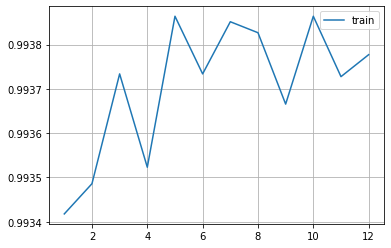

In [ ]:
plt.plot(max_features, scores_train, label='train')

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
models = []
scores_train = []
current_depth = []
max_depth = list(range(1, 10))
for depth in max_depth:
    model = RandomForestClassifier(n_estimators=6,
        max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    models.append(model)
    scores_train.append(model.score(X_train, y_train))
    current_depth.append(model.estimators_[0].get_depth()/depth)

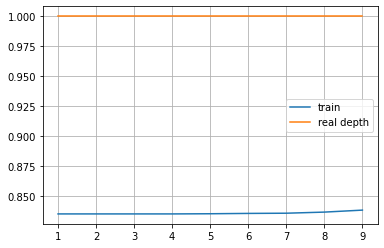

In [ ]:
plt.plot(max_depth, scores_train, label='train')
plt.plot(max_depth, current_depth, label='real depth')

plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier)

In [ ]:
model_adc = AdaBoostClassifier()

In [ ]:
model_adc.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
accuracy_score(y_train, model_adc.predict(X_train))

0.8352123762713756

In [ ]:
model_gbc = GradientBoostingClassifier()

In [ ]:
model_gbc.fit(X_train, y_train)
accuracy_score(y_train, model_gbc.predict(X_train))

0.8369540290440743

In [ ]:
model_bc = BaggingClassifier()

In [ ]:
model_bc.fit(X_train, y_train)
accuracy_score(y_train, model_bc.predict(X_train))

0.9802034200854092

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [ ]:
model_xgb = xgb.XGBClassifier()

In [ ]:
model_xgb.fit(X_train, y_train)
accuracy_score(y_train, model_xgb.predict(X_train))

0.8364581848383238

In [ ]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier(learning_rate=0.1, n_estimators=150,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                       param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(X_train,y_train)

In [ ]:
gsearch1.best_params_, gsearch1.best_score_

In [ ]:
param_test2 = {
    'max_depth':[2,3,4],
    'min_child_weight':[2,3,4]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, 
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,X_train)

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

In [ ]:
param_test2b = {
    'min_child_weight':[5,6,7]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test2b, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train,X_train)

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_

In [ ]:
param_test3 = {
    'gamma': [0, 0.2, 0.4, 0.6, 0.8, 1]
}
gsearch3b = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate=0.1, n_estimators=150, max_depth=4,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
                       param_grid = param_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
gsearch3b.fit(X_train, y_train)

In [ ]:
gsearch3b.best_params_, gsearch3b.best_score_

In [ ]:
xgb2 = xgb.XGBClassifier(
        learning_rate =0.1,
        n_estimators=150,
        max_depth=4,
        min_child_weight=...,
        gamma = ...,
        objective= 'binary:logistic',
        nthread=4,
        scale_pos_weight=1,
        seed=27)

In [ ]:
model_cbct = CatBoostClassifier(
    iterations=50,
    learning_rate=0.5,
    loss_function='CrossEntropy',
    custom_loss=['AUC', 'Accuracy']
)
model_cbct.fit(X_train, y_train)
print('Model is fitted: ' + str(model_cbct.is_fitted()))
print('Model params:')
print(model_cbct.get_params())

0:	learn: 0.5144368	total: 34.7ms	remaining: 1.7s
1:	learn: 0.4509121	total: 68.9ms	remaining: 1.65s
2:	learn: 0.4261758	total: 102ms	remaining: 1.59s
3:	learn: 0.4121105	total: 135ms	remaining: 1.55s
4:	learn: 0.4069483	total: 191ms	remaining: 1.72s
5:	learn: 0.4040140	total: 225ms	remaining: 1.65s
6:	learn: 0.4018493	total: 262ms	remaining: 1.61s
7:	learn: 0.3997045	total: 295ms	remaining: 1.55s
8:	learn: 0.3985954	total: 328ms	remaining: 1.49s
9:	learn: 0.3973113	total: 360ms	remaining: 1.44s
10:	learn: 0.3960322	total: 394ms	remaining: 1.4s
11:	learn: 0.3952560	total: 424ms	remaining: 1.34s
12:	learn: 0.3939785	total: 472ms	remaining: 1.34s
13:	learn: 0.3933456	total: 503ms	remaining: 1.29s
14:	learn: 0.3927828	total: 535ms	remaining: 1.25s
15:	learn: 0.3924264	total: 568ms	remaining: 1.21s
16:	learn: 0.3921452	total: 603ms	remaining: 1.17s
17:	learn: 0.3917977	total: 650ms	remaining: 1.15s
18:	learn: 0.3910868	total: 690ms	remaining: 1.13s
19:	learn: 0.3907832	total: 720ms	remaini

In [ ]:
accuracy_score(y_train, model_cbct.predict(X_train))

0.839439448125399

In [ ]:
model_cbct = CatBoostClassifier()

In [ ]:
model_cbct.fit(X_train, y_train)
accuracy_score(y_train, model_cbct.predict(X_train))

Learning rate set to 0.09029
0:	learn: 0.6410333	total: 98.8ms	remaining: 1m 38s
1:	learn: 0.5995043	total: 137ms	remaining: 1m 8s
2:	learn: 0.5670247	total: 175ms	remaining: 58.2s
3:	learn: 0.5406293	total: 217ms	remaining: 54.1s
4:	learn: 0.5179692	total: 259ms	remaining: 51.5s
5:	learn: 0.4983911	total: 313ms	remaining: 51.8s
6:	learn: 0.4853851	total: 347ms	remaining: 49.2s
7:	learn: 0.4703402	total: 394ms	remaining: 48.9s
8:	learn: 0.4581121	total: 437ms	remaining: 48.1s
9:	learn: 0.4482003	total: 480ms	remaining: 47.5s
10:	learn: 0.4421654	total: 518ms	remaining: 46.6s
11:	learn: 0.4350492	total: 554ms	remaining: 45.6s
12:	learn: 0.4292144	total: 590ms	remaining: 44.8s
13:	learn: 0.4259346	total: 626ms	remaining: 44.1s
14:	learn: 0.4234303	total: 668ms	remaining: 43.9s
15:	learn: 0.4204597	total: 705ms	remaining: 43.4s
16:	learn: 0.4183805	total: 744ms	remaining: 43s
17:	learn: 0.4166615	total: 799ms	remaining: 43.6s
18:	learn: 0.4144305	total: 851ms	remaining: 44s
19:	learn: 0.4

0.8508252706999461

In [ ]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_train, y_train)
accuracy_score(y_train, model_lgb.predict(X_train))

0.8400778475403028

In [ ]:
estimator = lgb.LGBMClassifier(num_leaves=31)

param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [20, 40]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, y_train)

print('Best parameters found by grid search are:', gbm.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 40}


In [ ]:
accuracy_score(y_train, gbm.predict(X_train))

0.837443675197253